# The GTA Housing, Machine Learning Project

Currently, the GTA is projected to be the fastest growing region of the province, accounting for over 65 percent of Ontario's net population growth to 2041. In July 2019, the Toronto Real Estate board reported that nearly 8,595 houses were sold which is up 24.3% compared to June 2018. With the massive number of houses being sold, and countless more being listed for sale, data was plentiful regarding the subject.

In this project and analysis, we will attempt to predict the value of a house, given its characteristics using Machine Learning Algorithms. Let's get started!

## Contents
* [Initial Data Analysis](#1)
* [In-Depth Data Analysis](#2)
* [Machine Learning/Modelling Stage](#3)






## Initial Data Analysis <a class="anchor" id="1"></a>

In [1]:
import pandas as pd
import os
import csv

MY_DIR = "C:\\Users\\Adit Krishnan\\Documents\\Third Year\\gta_ml_proj\\Data Gathering"


def load_housing_data(my_dir= MY_DIR):
    csv_path = os.path.join(my_dir, "housing_data.csv")
    return pd.read_csv(csv_path,converters={"Price(in CAD)":float})

Prior to working with the data, I undertook the task of scraping all the data from the MLS listing site, and formatting it to fit into a CSV file, which we can then work with to analyze the data using pandas. The above code simply loads that data into a pandas data frame, which we can then work with to gain more insight from the data.  

In [2]:
housing = load_housing_data() 
housing.head()

,Address,Postal Code,Latitude,Longitude,City,Neighbourhood,Price(in CAD),# of Bathrooms,# of Bedrooms,Height(in stories),# of Kitchens,# of Parking Spaces,Lot-Size(in feet),Total Lot Size(in square ft.),Basement(finished or not),House HTML
0,"86 Wessenger Dr, Holly, Barrie L4N8N7",L4N8N7,44.328711,-79.717816,Barrie,Holly,1880.0,2,3,2.0,1.0,3.0,14.22 x 35.00,497.700,No Basement,https://barrie.listing.ca/86-wessenger-dr.S452...
1,"86 Wessenger Dr, Holly, Barrie L4N8N7",L4N8N7,44.328711,-79.717816,Barrie,Holly,1880.0,2,3,2.0,1.0,3.0,14.22 x 35.00,497.700,No Basement,https://barrie.listing.ca/86-wessenger-dr.S452...
2,"118 Ferndale Dr, Ardagh, Barrie L4N6Y6",L4N6Y6,44.359932,-79.715513,Barrie,Ardagh,149900.0,0,0,NaN,NaN,NaN,59.35 x 124.06,7362.961,No Basement,https://barrie.listing.ca/118-ferndale-dr.S450...
3,"151 Edgehill Dr H10, 400 North, Barrie L4N1L9",L4N1L9,44.384539,-79.712689,Barrie,400 North,234500.0,1,2,NaN,1.0,NaN,NaN,NaN,No Basement,https://barrie.listing.ca/151-edgehill-dr-h10....
4,"126 Bell Farm Rd 311, City Centre, Barrie L4M6J3",L4M6J3,44.410643,-79.676170,Barrie,City Centre,236900.0,1,1,NaN,1.0,NaN,NaN,NaN,No Basement,https://barrie.listing.ca/126-bell-farm-rd-311...


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16274 entries, 0 to 16273
Data columns (total 16 columns):
Address                           16274 non-null object
Postal Code                       16268 non-null object
Latitude                          16274 non-null float64
Longitude                         16274 non-null float64
City                              16274 non-null object
Neighbourhood                     16274 non-null object
Price(in CAD)                     16274 non-null float64
# of Bathrooms                    16274 non-null int64
# of Bedrooms                     16274 non-null int64
Height(in stories)                12184 non-null float64
# of Kitchens                     16002 non-null float64
# of Parking Spaces               10784 non-null float64
Lot-Size(in feet)                 11428 non-null object
 Total Lot Size(in square ft.)    11371 non-null float64
Basement(finished or not)         16274 non-null object
House HTML                        16274 non-nu

Calling the info() and head() method, we can get a very brief and quick overview of the data. "housing.head()" gives an overview of the top 5 entries in the data and the info method reveals how many of each subcategory is present in the data. Notice that some of the values are missing, which will need to be fixed later on, if we are to use this data for Machine Learning later on.

In [4]:
housing["# of Parking Spaces"].value_counts()

2.0    4153
4.0    3355
3.0    1139
6.0     957
5.0     388
0.0     345
8.0     288
7.0      92
9.0      60
1.0       7
Name: # of Parking Spaces, dtype: int64

In [5]:
housing.describe()

,Latitude,Longitude,Price(in CAD),# of Bathrooms,# of Bedrooms,Height(in stories),# of Kitchens,# of Parking Spaces,Total Lot Size(in square ft.)
count,16274.000000,16274.000000,1.627400e+04,16274.000000,16274.000000,12184.000000,16002.000000,10784.000000,11371.000000
mean,43.781712,-79.444649,1.118783e+06,2.997911,3.681639,1.842580,1.220972,3.367953,8191.411673
std,0.252923,0.283367,9.761885e+05,1.454864,1.527349,0.550948,0.539928,1.672920,21214.521967
min,42.878706,-81.332785,1.880000e+03,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,43.656871,-79.649063,5.999000e+05,2.000000,3.000000,2.000000,1.000000,2.000000,3201.000000
50%,43.761077,-79.452046,8.299000e+05,3.000000,4.000000,2.000000,1.000000,3.000000,4944.511800
75%,43.880001,-79.354488,1.289000e+06,4.000000,5.000000,2.000000,1.000000,4.000000,7381.310000
max,46.329364,-74.727106,2.199900e+07,9.000000,18.000000,3.000000,18.000000,9.000000,555100.000000


Calling housing.describe() we can gain even more valuable information about the data such as the count, mean, standard deviation, etc.

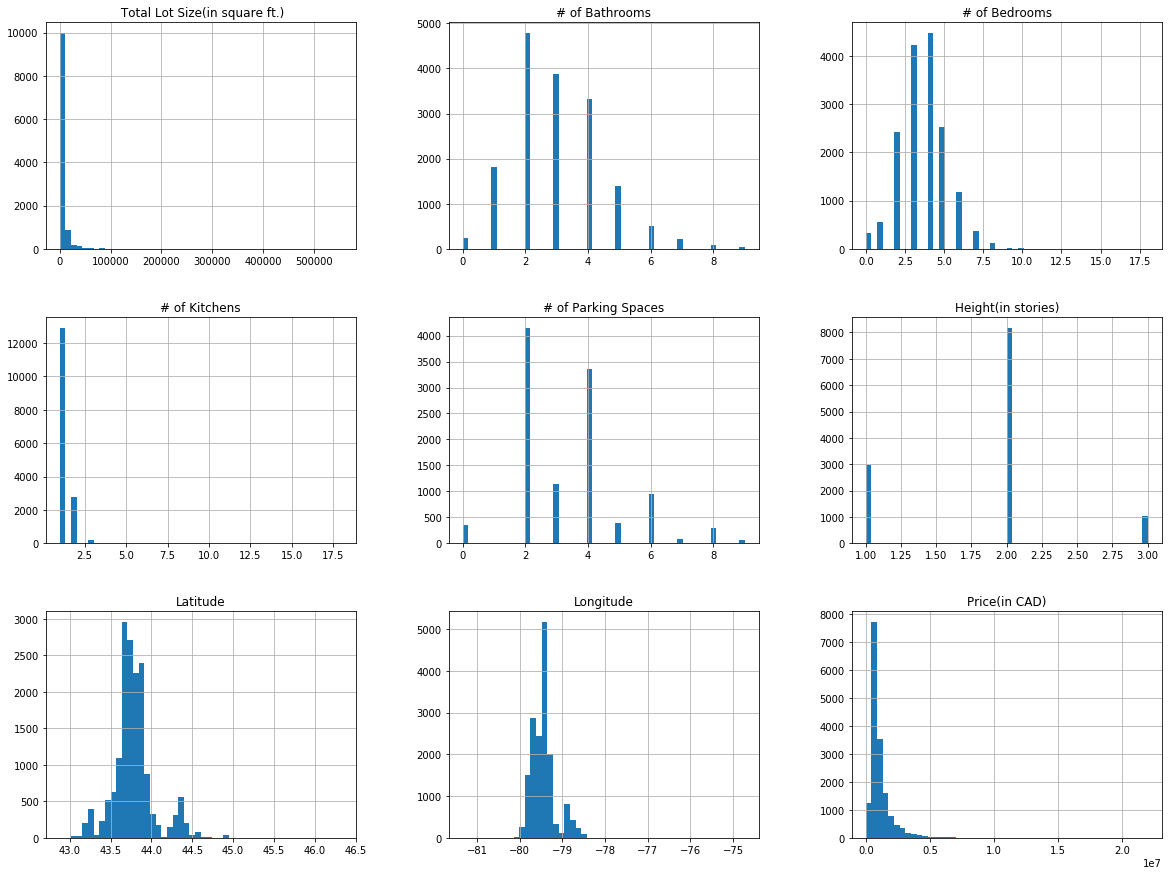

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
import numpy as np

housing["value_cat"] = np.ceil(housing["Price(in CAD)"] / 100000)
housing["value_cat"].where(housing["value_cat"] < 20, 20.0, inplace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["value_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Now, we are taking some of the first steps towards preparing our data to be used for Machine Learning processes. We are creating two seperate sets, a training set and a test set which has been split according to an index I created known as the "value_cat" which is based on the prices of the houses. The StratifiedShuffleSplit() method from sklearn ensures that a proportional amount from each price category is chosen to create the train set and test set so that we can avoid any biases in the data. The exact proportions are seen below. Sci-Kit really does make life a little bit easier. 

In [8]:
housing["value_cat"].value_counts() / len(housing)

7.0     0.116075
6.0     0.113863
20.0    0.113617
8.0     0.109008
9.0     0.092725
5.0     0.092233
10.0    0.065933
12.0    0.045041
13.0    0.039327
4.0     0.037790
11.0    0.037237
14.0    0.029372
15.0    0.026361
16.0    0.021384
17.0    0.016960
18.0    0.015546
19.0    0.011859
3.0     0.009156
1.0     0.004240
2.0     0.002274
Name: value_cat, dtype: float64

## In-Depth Data Analysis <a class="anchor" id="2"></a>

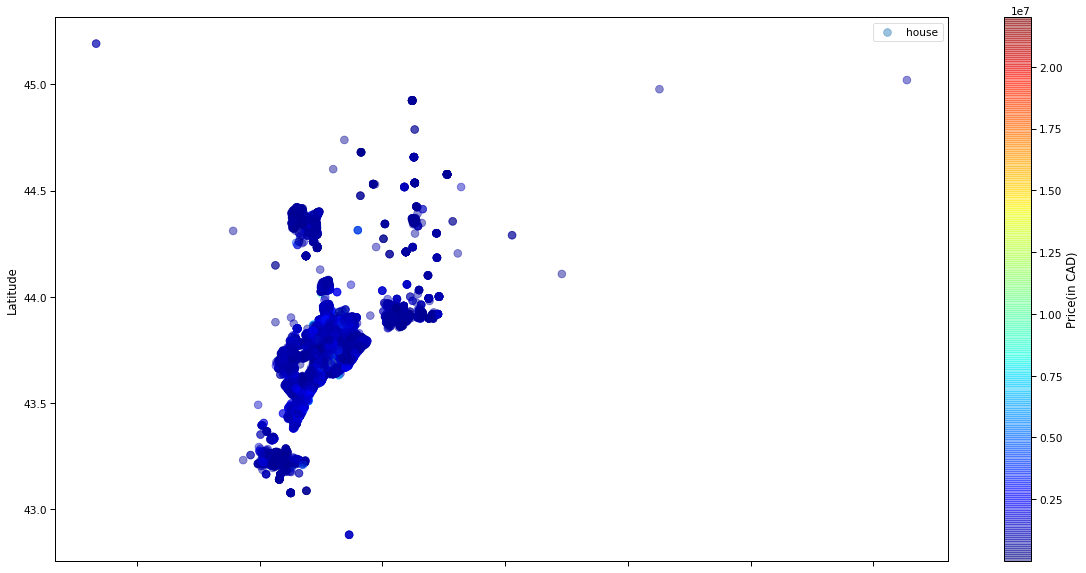

In [57]:
housing = strat_train_set.copy()
# housing.sort_values("Price(in CAD)", ascending=True)
# housing.head()

housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.45, 
             s=60, label="house", c="Price(in CAD)", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 22})
plt.savefig('distribution_of_prices.png', bbox_inches='tight')

Above, we can see a graph which graphs the distribution of houses in GTA, with as associated color bar on the right which shows their listing price/value. Amazingly, we can kind of see the shape of the shoreline of Lake Ontario on the right side. However, sadly, there is not much insight we can gain from this graph as it just appears to show that most houses are in the $500,000 - $750,000 dollar price range. It is not as effective at communicating the distribution of values of houses in different regions as I expected. Thus, we will have to try using different charts to gain a more better understanding.

In [10]:
# from ipynb.fs.full.ml_practice_project import test_set_check, split_train_test_by_id
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
for set in (strat_train_set, strat_test_set):
    set.drop(["value_cat"], axis=1, inplace=True)

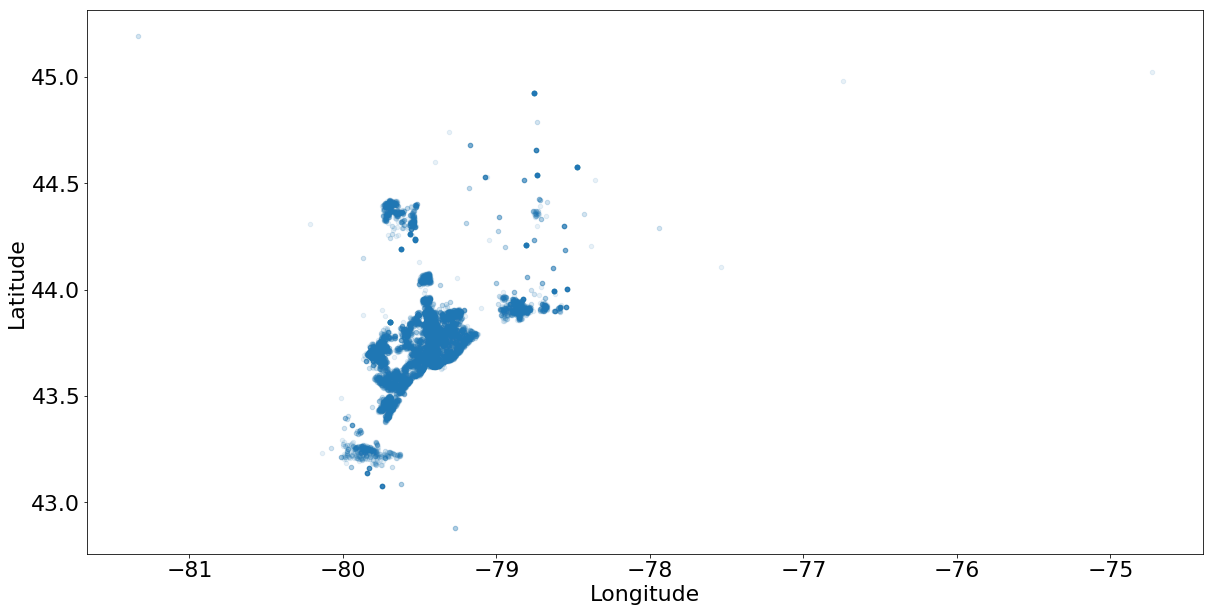

In [12]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

Now, altering the alpha parameter in our graph, makes it a lot easier to visualize where there is a high density of houses. Just by looking at the graph, we can see clearly that the Toronto area has a large density, as well as the surrounding Municipalities near it (Mississauga, Brampton, etc.)

In [13]:
housing.head()

,Address,Postal Code,Latitude,Longitude,City,Neighbourhood,Price(in CAD),# of Bathrooms,# of Bedrooms,Height(in stories),# of Kitchens,# of Parking Spaces,Lot-Size(in feet),Total Lot Size(in square ft.),Basement(finished or not),House HTML
10329,"36 Lee Centre Dr Th305, Woburn, Toronto M1H3K2",M1H3K2,43.780730,-79.246955,Toronto,Woburn,539900.0,3,2,2.0,1.0,NaN,NaN,NaN,No Basement,https://toronto.listing.ca/36-lee-centre-dr-th...
8007,"291 Poplar St, Donevan, Oshawa L1H6P6",L1H6P6,43.897179,-78.835035,Oshawa,Donevan,549900.0,2,4,1.0,2.0,4.0,50.00 x 100.00,5000.0000,No Basement,https://oshawa.listing.ca/291-poplar-st.E45345...
4119,"10 Dunsheath Way 201, Cornell, Markham L6B0A2",L6B0A2,43.891956,-79.276683,Markham,Cornell,485000.0,2,2,NaN,1.0,NaN,NaN,NaN,No Basement,https://markham.listing.ca/10-dunsheath-way-20...
7750,"355 Ritson Rd, Central, Oshawa L1H5J4",L1H5J4,43.890936,-78.849669,Oshawa,Central,349000.0,2,3,1.0,1.0,5.0,33.00 x 100.00,3300.0000,No Basement,https://oshawa.listing.ca/355-ritson-rd.E44501...
1107,"29 Saint Eugene St, Bram West, Brampton L6Y0K8",L6Y0K8,43.873265,-79.722789,Brampton,Bram West,689900.0,3,4,2.0,1.0,2.0,19.69 x 90.06,1773.2814,Unfinished,https://brampton.listing.ca/29-saint-eugene-st...


In [14]:
housing["pricing_cat"] = round(housing["Price(in CAD)"], -5)       
housing["pricing_cat"]

10329     500000.0
8007      500000.0
4119      500000.0
7750      300000.0
1107      700000.0
11337     700000.0
10701     600000.0
12811    1000000.0
7274     1100000.0
14990    7500000.0
9830      400000.0
15346     900000.0
13633    1400000.0
9757      400000.0
387       600000.0
6467     2500000.0
1049      700000.0
4157      500000.0
1507      800000.0
9755      400000.0
14732    3300000.0
11405     700000.0
5539      700000.0
3874      500000.0
10633     600000.0
10397     600000.0
3337      500000.0
4177      600000.0
4769     1300000.0
9425     4300000.0
           ...    
4627     1100000.0
3353      500000.0
386       600000.0
10377     500000.0
2952      700000.0
11270     700000.0
13967    1700000.0
5722      800000.0
13783    1600000.0
9842      400000.0
1511      800000.0
4782     1300000.0
11768     800000.0
15736    1500000.0
11045     700000.0
6977     2700000.0
6468     2500000.0
8431      500000.0
16204     800000.0
10841     600000.0
7707      200000.0
2080      50

Here, we are adding a price category section to our data, so that we can create a pie chart depicting the breakdown of the houses and their respective prices. We can gain a better understanding of exactly what percent of houses fall into a particular price range in the GTA.

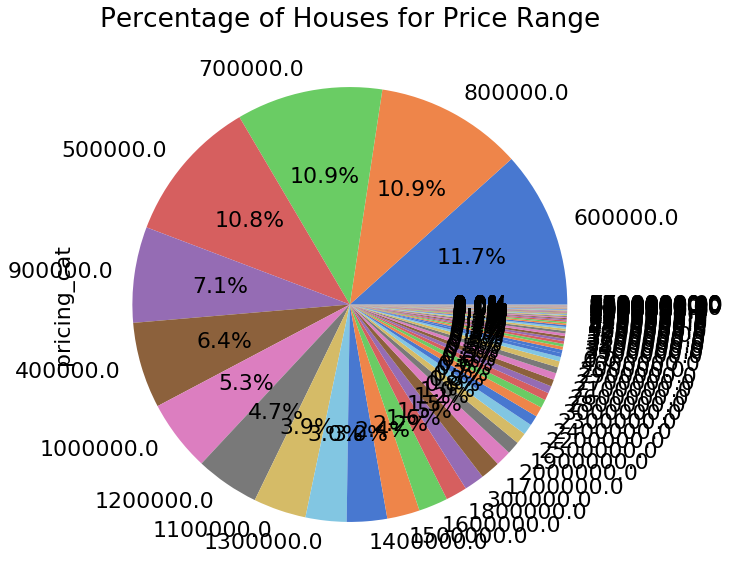

In [15]:
import seaborn as sns
c = sns.color_palette('muted')
for i in range(21):
    c.append(c[i])
ax = housing["pricing_cat"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=c, title='Percentage of Houses for Price Range')
plt.rcParams.update({'font.size': 12})

Ah, so it is just as we hypothesized earlier from the scatter chart. Not the most visually appealing chart, but it confirms that majority of houses in the GTA are in the 600000 to 1000000 dollar price range* 

*The price_cat attribute was created by rounding a particular house value down to the nearest 100000 so for example houses in the 600000 price_cat have a price between 600000 to 700000).

In [16]:
corr_matrix = housing.corr()
corr_matrix["Price(in CAD)"].sort_values(ascending=False)

Price(in CAD)                     1.000000
pricing_cat                       0.999603
# of Bathrooms                    0.568471
# of Bedrooms                     0.414038
 Total Lot Size(in square ft.)    0.161246
# of Parking Spaces               0.155015
# of Kitchens                     0.150059
Height(in stories)                0.116038
Longitude                        -0.048366
Latitude                         -0.095611
Name: Price(in CAD), dtype: float64

By calling the corr method, we can measure the correlation between the variables and see which one correlates the strongest with the price. We can ignore the pricing_cat, and the next strongest variable appears to be the # Of Bathrooms upon first glance. However, I have a feeling this does not tell us the complete picture, and some more work has to be done to gain more insights into the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025FD608E4E0>,
      dtype=object)

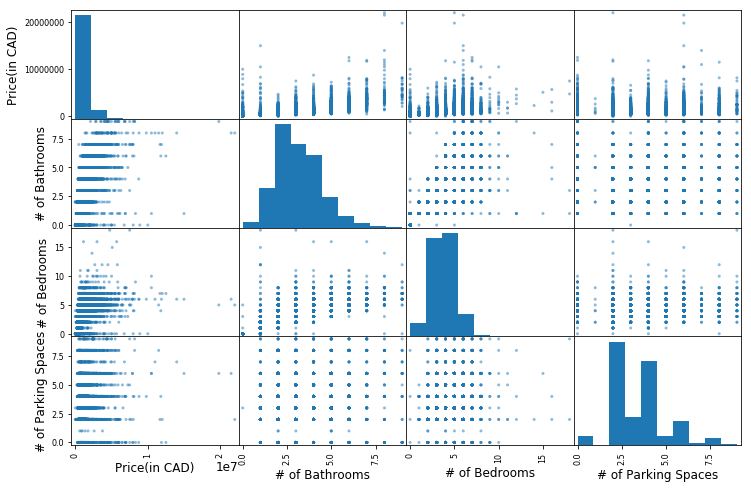

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["Price(in CAD)", "# of Bathrooms", "# of Bedrooms", 
             "# of Parking Spaces"]
scatter_matrix(housing[attributes], figsize=(12, 8))

We can also measure correlation visually using the scatter_matrix method. Recall that # of Bathrooms had a strong correlation so we can take a closer look at that. 

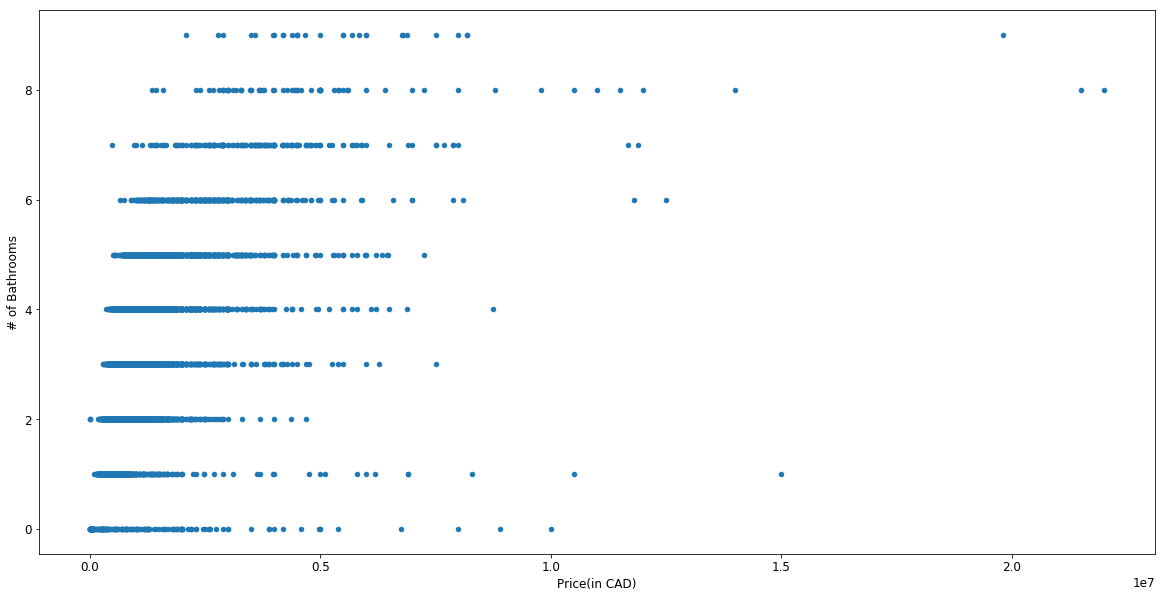

In [18]:
housing.plot(kind="scatter", x="Price(in CAD)", y="# of Bathrooms")

We can see now more clearly that the correlation between price and number of bathrooms was not entirely true. Since we are comparing a continous variable with one that has discrete values, these discrepancies can occur. Thus, we see that strictly speaking the characteristics of the house do not have a direct correlation on the value of the house. 



The code below is to implement a stacked bar graph later of the data. This is still a work in progress, and I will be adding more charts and data as I continue to work on this project.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """
    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)
    
    plt.legend()

    if grid:
        plt.grid()


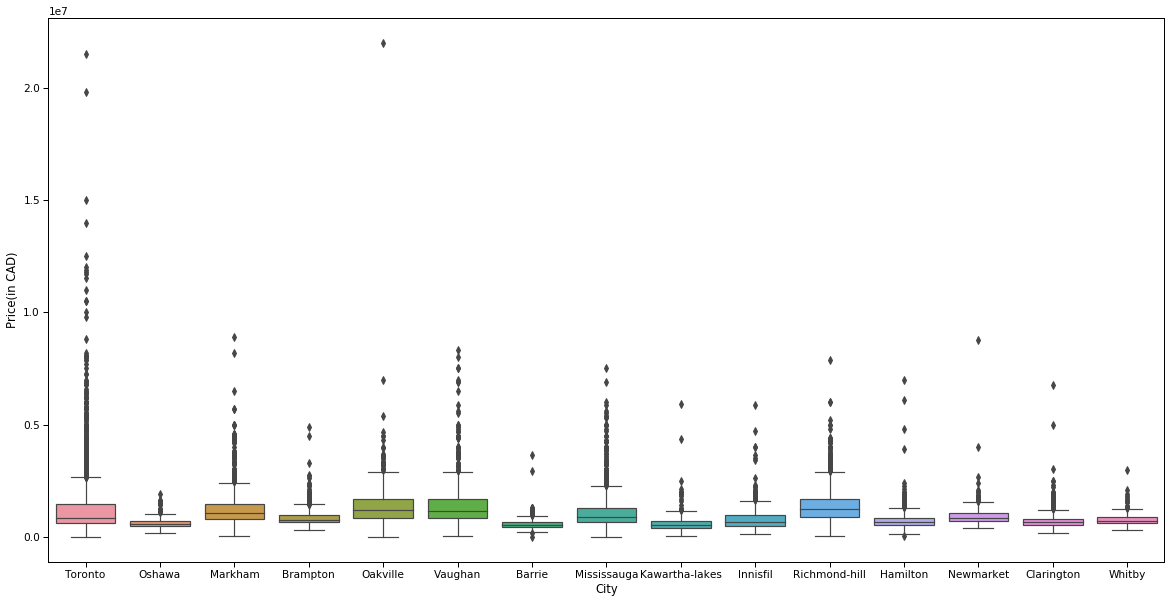

In [20]:
import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set_style("darkgrid")
sns.set_context(context="paper", font_scale=1.2)
sns.boxplot(x= housing["City"], y= housing["Price(in CAD)"])

Much Better. As opposed to our scatterplot from earlier, I find that this boxplot helps convey a lot more information. Something that surprised me about the data is the fact that the median house value for all of the cities appear to be close. I was expecting cities which I perceived to be "richer", to have much higher median values. However, what we can notice is that these richer cities have a lot more outliers, that are in that higher range. Taking a look at Toronto, Markham, Oakville, Vaughan, and Richmond-Hill, we can see that they have a lot more outliers in that higher price range. Overall, we can gather from the data that all cities in the GTA have a very similar median house value, however, some have a lot more outliers in those higher price ranges than others, namely, the ones we hear as being "rich" neighbourhoods.

However, I still had some questions. Given that a house has all other characteristics equal, would a house be valued more just because it is in another city? This is what I wanted to continue exploring. We can get a quick idea about this calling the median method after grouping by city.

In [21]:
housing.groupby("City").median()

,Latitude,Longitude,Price(in CAD),# of Bathrooms,# of Bedrooms,Height(in stories),# of Kitchens,# of Parking Spaces,Total Lot Size(in square ft.),pricing_cat
City,,,,,,,,,,
Barrie,44.371646,-79.690698,544500.0,3,4,2.0,1.0,3.0,5390.46340,500000.0
Brampton,43.708165,-79.759528,749900.0,3,4,2.0,1.0,3.0,3635.61195,700000.0
Clarington,43.917411,-78.688948,643950.0,3,4,2.0,1.0,2.0,4913.63525,600000.0
Hamilton,43.236815,-79.844465,649900.0,3,4,2.0,1.0,3.0,4490.40890,600000.0
Innisfil,44.306908,-79.548443,674500.0,3,3,2.0,1.0,4.0,8000.00000,700000.0
Kawartha-lakes,44.516657,-78.743576,534900.0,2,3,1.0,1.0,4.0,15260.00000,500000.0
Markham,43.866016,-79.309689,1058000.0,3,4,2.0,1.0,3.0,4689.79480,1100000.0
Mississauga,43.575884,-79.647491,889000.0,3,4,2.0,1.0,4.0,5722.36210,900000.0
Newmarket,44.048787,-79.463252,819800.0,3,4,2.0,1.0,4.0,5122.17200,800000.0


So, looking at the table we can notice a number of things. Firstly, the median house values are not as close as what the boxplot is showing. Looking at this table, the differences in median house values are a bit more drastic. Looking at the actual values, the differences in house value are much more evident.

We can see that the median house values are much higher in cities like Richmond-Hill, Oakville, Vaughan, Markham, etc. Also, to answer my question from before, location does appear to be a big factor. For example, the chart shows that that a 3 bathroom and 4 bedroom house in Markham has a median house value that is much less than a house with similar characteristics in Mississauga. In fact, the houses in Mississauga have a cheaper median value, with a larger lot size in comparison with Markham!

I also found it interesting that increase in price, does not necessarily correlate with a larger lot size or even more bedrooms and bathrooms. More rural cities like Innisfil offer larger lot sizes at much cheaper prices.

In [22]:
housing.groupby("City").mean()

,Latitude,Longitude,Price(in CAD),# of Bathrooms,# of Bedrooms,Height(in stories),# of Kitchens,# of Parking Spaces,Total Lot Size(in square ft.),pricing_cat
City,,,,,,,,,,
Barrie,44.372442,-79.682594,5.742365e+05,2.695364,3.644592,1.708333,1.156250,3.216667,5664.483476,5.671082e+05
Brampton,43.712783,-79.759831,8.539067e+05,3.423280,4.203704,1.961612,1.325333,3.227766,5363.239002,8.481481e+05
Clarington,43.932429,-78.697343,7.697274e+05,2.751337,3.462567,1.670588,1.101124,2.738462,15946.609865,7.620321e+05
Hamilton,43.235404,-79.842744,7.631298e+05,2.737303,3.770578,1.702857,1.275676,3.325527,11625.353530,7.579685e+05
Innisfil,44.295131,-79.561133,8.351651e+05,2.664160,3.350877,1.572727,1.094488,3.655488,20348.946000,8.298246e+05
Kawartha-lakes,44.478672,-78.737235,6.340200e+05,2.063333,3.193333,1.294776,1.115108,3.886792,33074.960638,6.266667e+05
Markham,43.855916,-79.317897,1.300390e+06,3.482366,3.980660,2.017192,1.167048,3.373134,7288.144178,1.298862e+06
Mississauga,43.578047,-79.656588,1.171381e+06,3.186574,3.800349,1.881533,1.195013,3.502525,7995.136732,1.168091e+06
Newmarket,44.047826,-79.461744,9.658156e+05,3.376900,4.009119,1.892405,1.226300,3.648936,6703.146041,9.623100e+05


In [23]:
housing = strat_train_set.drop("Price(in CAD)", axis=1)
housing_labels = strat_train_set["Price(in CAD)"].copy()

## Machine Learning/Modelling Stage <a class="anchor" id="3"></a>

Moving onto prepping the data to make it suitable to apply Machine Learning algorithms. Recall that our data had a lot of values missing from it initially. To aid in this, we can use the imputer method, which fills in for these missing values using the median. 

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [25]:
housing_num = housing.drop(['Address', 'Postal Code', 'City', 'Neighbourhood', 'Lot-Size(in feet)', 'Basement(finished or not)',
                           'House HTML'], axis=1)
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [26]:
imputer.statistics_

array([ 4.3761637e+01, -7.9450643e+01,  3.0000000e+00,  4.0000000e+00,
        2.0000000e+00,  1.0000000e+00,  3.0000000e+00,  4.9621000e+03])

In [27]:
housing_num.median().values

array([ 4.3761637e+01, -7.9450643e+01,  3.0000000e+00,  4.0000000e+00,
        2.0000000e+00,  1.0000000e+00,  3.0000000e+00,  4.9621000e+03])

In [28]:
X = imputer.transform(housing_num)
print(X)

[[ 4.37807300e+01 -7.92469550e+01  3.00000000e+00 ...  1.00000000e+00
   3.00000000e+00  4.96210000e+03]
 [ 4.38971790e+01 -7.88350350e+01  2.00000000e+00 ...  2.00000000e+00
   4.00000000e+00  5.00000000e+03]
 [ 4.38919560e+01 -7.92766830e+01  2.00000000e+00 ...  1.00000000e+00
   3.00000000e+00  4.96210000e+03]
 ...
 [ 4.38578245e+01 -7.88497430e+01  2.00000000e+00 ...  1.00000000e+00
   3.00000000e+00  3.03160000e+03]
 [ 4.43940230e+01 -7.97239240e+01  2.00000000e+00 ...  1.00000000e+00
   4.00000000e+00  4.40083380e+03]
 [ 4.36485400e+01 -7.97500900e+01  3.00000000e+00 ...  1.00000000e+00
   2.00000000e+00  2.45629450e+03]]


In [29]:
import pandas as pd
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["Basement(finished or not)"]
housing_cat_2 = housing["City"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded_2 = encoder.fit_transform(housing_cat_2)
housing_cat_encoded

array([1, 1, 1, ..., 0, 1, 0])

Now, one final step before applying the Machine Learning algorithms is encoding the values. We are using something known as "One Hot Encoding" which transforms non-categorical data into numerical values (either one or zero). This can be easily fed into the algorithm for us to be able to utilize various algorithms. This is not a requirement for all Machine Learning Algorithms, however, it just makes the task a lot easier as we just have to do it once, and apply it to all our ML algorithms afterwards

In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder, encoder_2 = OneHotEncoder(), OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot_2 = encoder_2.fit_transform(housing_cat_encoded_2.reshape(-1, 1))
housing_cat_1hot.toarray()
housing_cat_1hot_2.toarray()

C:\Users\Adit Krishnan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Adit Krishnan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'"

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [32]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [33]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin 

class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(housing_num)
cat_attribs = ["Basement(finished or not)"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

Just to summarize everything we have done with the dataset thus far, and so that it does not have to be repeated everytime we create a new subset of the housing data, I have utilized sklearn's pipeline method so that we can just call the full_pipeline method to quickly and reliably transform our data whenever it is needed.

In [34]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-4.87862795e-03,  6.87154679e-01,  6.30111712e-04, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 4.57018461e-01,  2.13544511e+00, -6.82988586e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 4.36301336e-01,  5.82632495e-01, -6.82988586e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.00918117e-01,  2.08373251e+00, -6.82988586e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.42775928e+00, -9.89844833e-01, -6.82988586e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-5.29212682e-01, -1.08184320e+00,  6.30111712e-04, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Our data is finally ready to be used for Machine Learning. One of the most common and basic algorithms is Linear Regression. I am just going to test this model to see that everything is working probably thus far.

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [1138786.2798816   881809.1733219   699133.4982525   928385.21957356
  773111.33271135]
Labels:		 [539900.0, 549900.0, 485000.0, 349000.0, 689900.0]


Nice! Atleast everything is working properly. However, as is immediately evident, the regression is working quite poorly, as the predictions it is making is way off. Let's measure the mean squared error to see exactly how bad it is performing.

In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

784487.526005666

With a mean squared error of nearly $754,862 (indicates that this is the margin of error), this is clearly not the most effective Machine Learning Algorithm. Our best course of action is to move on, and attempt to find a more effective ML algorithm.

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Another method we can try is a Decision Tree Regressor, which is a much more advanced algorithm than Linear Regression and will most probably yield much better results. 

In [39]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", tree_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [539900. 549900. 485000. 349000. 689900.]
Labels:		 [539900.0, 549900.0, 485000.0, 349000.0, 689900.0]


What! It appears our algorithm is working perfectly! NO, not true. What we are seeing here is an example of something known as "overfitting", as the algorithm is modelling the training set too well and is picking up on the noise. This situation is not ideal, as it indicates that the algorithm fits the training set data too well and thus, does not generalize well to other datasets. We can see this by computing the mean squared error, which I have below.

While it is not perfect, we can definitely see that we are improving and on the right track.

In [58]:
import numpy as np
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

632964.2559350071

Now, we are using a more powerful Machine Learning model known as a Decision Tree Regressor and we can see that the mean squared error has reduced much more drastically, so we are on the right track to picking the most effective model. Let's now working on fine tuning this model.

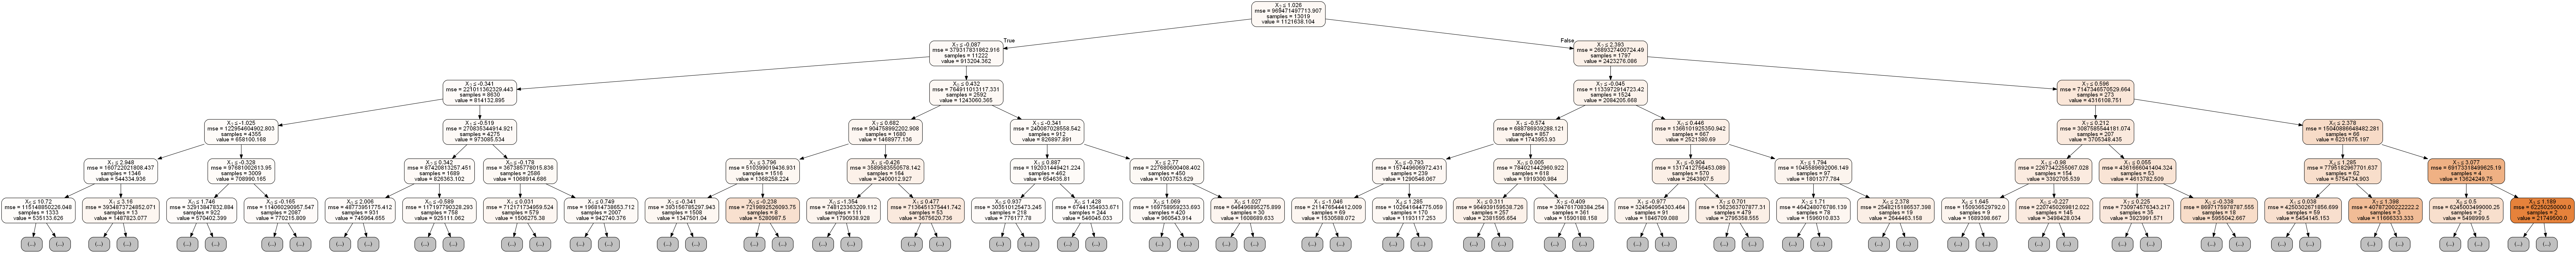

In [41]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

dot_data = StringIO()

export_graphviz(
    tree_reg,
    max_depth = 5,
    out_file="decision_tree.dot",
    filled=True, 
    rounded=True,
    special_characters=True
#     feature_names=housing_labels
)

Image("decision_tree.png")

Above, you can see a visualization of how the decision_tree makes decisions (the above image might be a bit hard to see, so I have also uploaded a png of the this same image in the same repository). Without getting too much into the fine details, the decision tree essentially tries to split the training set in such a way that the MSE (Mean Squared Error) is minimized. The value that is predicted at each node is the average of the number of training samples of that particular node. I have not printed the entire tree here as it is quite extensive and my computer simply cannot handle it! However, this process is continued recursively until the algorithm decides that it cannot split any more, in which case that value is returned. This is a gross oversimplification and in reality a lot more goes into how the splits are decided (the CART algorithm, etc.), however, this graphic provides us with a good base level idea of how exactly it works.

Recall, that we had an issue with our decision tree overfitting the data really badly. This is quite a common issue with decision tree regressors, however, we can fix this by tuning and altering the hyperparameters of the model as we are going to do below.

In [42]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(rmse_scores)

Scores:  [678103.41756729 728367.90341763 589514.84471097 699865.43928151
 650274.37477212 647351.0106909  737659.2725168  697438.19237954
 875628.9920093  569584.08231531]
Mean:  687378.7529661366
Standard deviation:  81499.33687433806


Above, I have also created a function which will allow us to get a complete picture regarding the accuracy of our algorithms. It will come in handy as we move onto evaluating the effectiveness of our various algorithms.

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_grid = {'max_depth': sp_randint(1, 100), 'max_features': sp_randint(2, 6), 
     'min_samples_split': sp_randint(2, 200), 'min_samples_leaf': sp_randint(1, 50)}


forest_reg = DecisionTreeRegressor()

grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, iid=False)

grid_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=False, n_iter=10, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FD96A8898>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FD966C198>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FD604A860>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FDA419EF0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [55]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=80, max_features=4,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=6,
           min_samples_split=117, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = grid_search.best_estimator_
tree_reg.fit(housing_prepared, housing_labels)
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", tree_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [1439646.56989247  674171.84090909  559666.33636364  638928.60526316
  975876.13761468]
Labels:		 [539900.0, 549900.0, 485000.0, 349000.0, 689900.0]


In [46]:
import numpy as np
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

575153.55120528

So we can see that by tuning the hyper-parameters, we were able to improve its score slightly. Playing around with the values more, we can probably reduce this mean squared error further. However, I feel that a different algorithm could work more effectively. Since we saw that the decision tree is overfitting our data, another algorithm we can use is the Random Forest Regressor. The best way to think of how a Random Forest Regressor works, is like a collection of decsion tree regressors. The random forest regressor trains on a collection of decision forest regressors, each on a different random subset of the data. Then, to obtain the prediction, looks at the collection and picks the best one. This is obviously an oversimplification, but gives the gist of how it works.

In [47]:
from sklearn.model_selection import cross_val_score
import numpy as np

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [905937.1562455  731507.51176736 770690.73385133 793545.65010702
 690684.70468035 759703.93691312 880565.92632985 817647.27194965
 798475.77207244 699380.25203419]
Mean:  784813.8915950817
Standard deviation:  67090.2176049475


## Random Forest Regressor

Below is my implementation of the Random Forest Regressor, on the data. The steps to implementing it to our dataset is nearly identical to Decision Trees (fitting, tuning, etc.)

In [48]:
from sklearn.ensemble import RandomForestRegressor
import warnings 

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    # execute code that will generate warnings
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

C:\Users\Adit Krishnan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores:  [606316.68492938 483272.13720027 496643.91825585 532327.9909786
 479926.38911157 503155.72629196 627416.93428443 470838.45888409
 659503.93011619 475411.18723718]
Mean:  533481.3357289518
Standard deviation:  67062.59409870602


In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [50]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [51]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

654896.993849965 {'max_features': 2, 'n_estimators': 3}
560003.658071006 {'max_features': 2, 'n_estimators': 10}
555666.2297866158 {'max_features': 2, 'n_estimators': 30}
603581.32945781 {'max_features': 4, 'n_estimators': 3}
542203.3442475422 {'max_features': 4, 'n_estimators': 10}
530831.9895079421 {'max_features': 4, 'n_estimators': 30}
598377.2779299777 {'max_features': 6, 'n_estimators': 3}
544215.8819611517 {'max_features': 6, 'n_estimators': 10}
508440.150062489 {'max_features': 6, 'n_estimators': 30}
580314.7250231031 {'max_features': 8, 'n_estimators': 3}
555143.1945704219 {'max_features': 8, 'n_estimators': 10}
509720.4070046275 {'max_features': 8, 'n_estimators': 30}
636541.7602351859 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
561642.2984183421 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
614978.5758393216 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
556090.0606458805 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
600

Here I was actually displayed some of the parameter values that the graph was testing. We can see that by calling best_estimator_, we are able to get the best result immedieately. 

In [52]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.14087686, 0.14609311, 0.36529991, 0.07371385, 0.01966259,
       0.0277146 , 0.03116941, 0.18387668, 0.00513103, 0.00436592,
       0.00209605])

In [53]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Price(in CAD)", axis=1)
y_test = strat_test_set["Price(in CAD)"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

537303.4689205433


Overall, we can see that the Random Forest Regressor was able to provide us with the best model for our data-set, by minimizing the mean squared error by the most. However, I am far from done with this project. I will continue to tune my hyper-parameters, as realistically, having MSE of over 500,000 is not good at all. Stay tuned for more updates!